# Logistic Regression

In [1]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def fit_sgd(self, X, y):
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.num_iterations):
            for i in range(X.shape[0]):
                z = np.dot(X[i], self.theta)
                h = self.sigmoid(z)
                gradient = X[i] * (h - y[i])
                self.theta -= self.learning_rate * gradient

    def fit_mini_batch(self, X, y, batch_size=32):
        self.theta = np.zeros(X.shape[1])
        n_samples = X.shape[0]

        for _ in range(self.num_iterations):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                z = np.dot(X_batch, self.theta)
                h = self.sigmoid(z)
                gradient = np.dot(X_batch.T, (h - y_batch)) / batch_size
                self.theta -= self.learning_rate * gradient

Results:

Batch Gradient Descent:
  Training Time: 0.0732
  Train Accuracy: 0.9762
  Test Accuracy: 0.9770
  Train Loss: 0.0915
  Test Loss: 0.0888

Stochastic Gradient Descent:
  Training Time: 0.4664
  Train Accuracy: 0.9848
  Test Accuracy: 0.9840
  Train Loss: 0.0502
  Test Loss: 0.0497

Mini-batch Gradient Descent:
  Training Time: 0.3266
  Train Accuracy: 0.9852
  Test Accuracy: 0.9840
  Train Loss: 0.0401
  Test Loss: 0.0406


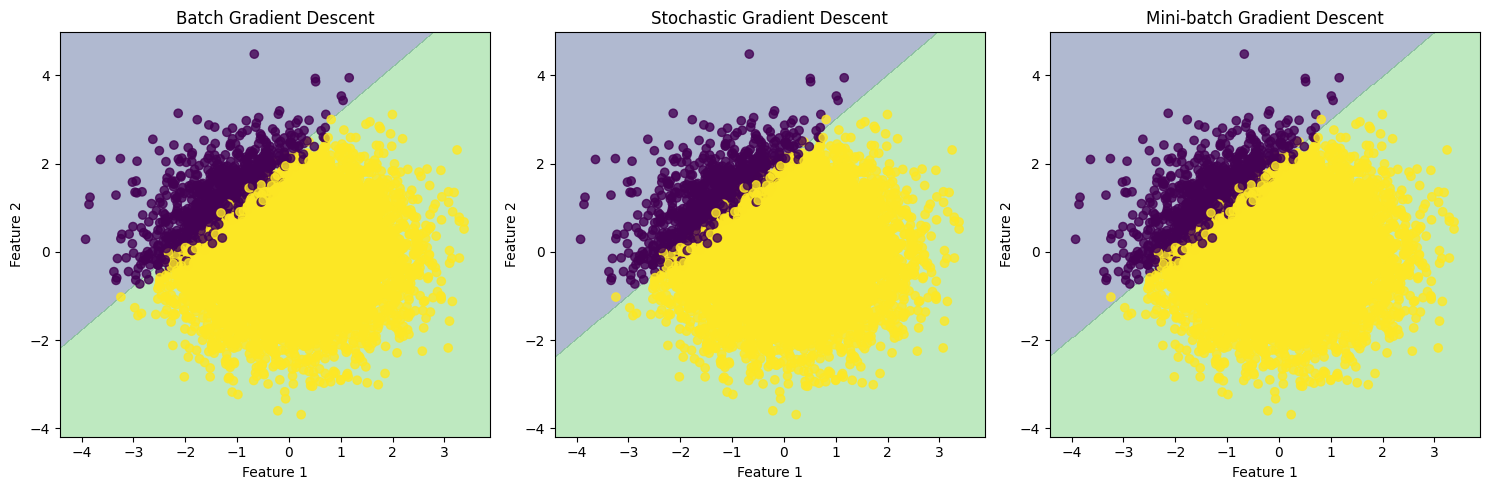

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import time

# Generate synthetic data
np.random.seed(42)
n_samples = 10000
n_features = 2

X = np.random.randn(n_samples, n_features)
true_theta = np.array([1, 0.5, -0.5])
X_with_bias = np.c_[np.ones((n_samples, 1)), X]
y = (np.dot(X_with_bias, true_theta) + np.random.randn(n_samples) * 0.1) > 0
y = y.astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_prob = model.predict_prob(X)
    accuracy = accuracy_score(y, y_pred)
    loss = log_loss(y, y_pred_prob)
    return accuracy, loss

# Test and benchmark the LogisticRegression class
models = {
    "Batch Gradient Descent": LogisticRegression(learning_rate=0.1, num_iterations=1000),
    "Stochastic Gradient Descent": LogisticRegression(learning_rate=0.01, num_iterations=10),
    "Mini-batch Gradient Descent": LogisticRegression(learning_rate=0.1, num_iterations=100)
}

results = {}

for name, model in models.items():
    start_time = time.time()
    
    if name == "Batch Gradient Descent":
        model.fit(X_train, y_train)
    elif name == "Stochastic Gradient Descent":
        model.fit_sgd(X_train, y_train)
    else:
        model.fit_mini_batch(X_train, y_train, batch_size=32)
    
    training_time = time.time() - start_time
    
    train_accuracy, train_loss = evaluate_model(model, X_train, y_train)
    test_accuracy, test_loss = evaluate_model(model, X_test, y_test)
    
    results[name] = {
        "Training Time": training_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Loss": train_loss,
        "Test Loss": test_loss
    }

# Print results
print("Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Visualize decision boundaries
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    plt.title(name)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()